The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


0.08907715843123602 -3.158097544555796
0.0946416925692382 -4.102685723764239
0.07755180627243252 -3.9647316730853492


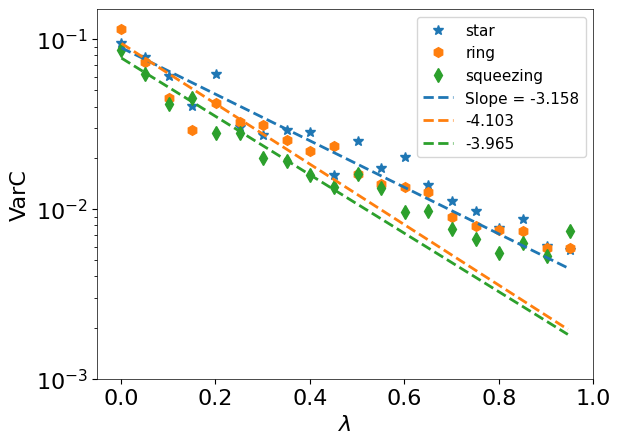

In [57]:
from scipy.optimize import curve_fit
import numpy as np
import matplotlib.pyplot as plt
from numpy import arange
import matplotlib as mpl

x = [0.001, 0.051000000000000004, 0.101, 0.15100000000000002, 0.201, 0.251, 0.30100000000000005, 0.35100000000000003, 0.401, 0.451, 0.501, 0.551, 0.6010000000000001, 0.651, 0.7010000000000001, 0.751, 0.801, 0.8510000000000001, 0.901, 0.9510000000000001]
ystar = [0.09501880654519514, 0.07857840931558979, 0.0603006068407432, 0.040205107419873605, 0.06238766509678797, 0.03047150305420126, 0.02733212208228261, 0.029162037338447844, 0.02847696629044725, 0.01591015992766915, 0.025235264493195207, 0.017300149756421662, 0.02021651233833391, 0.013795098028697312, 0.011146259498409588, 0.009666324059659396, 0.007714322454074458, 0.008663075569554063, 0.0060080094226958695, 0.005705041817965704]
ypoly = [0.11420168703571265, 0.07362139222225164, 0.045032761752803484, 0.028966193564247057, 0.04173427267263526, 0.03236429737386962, 0.03113259877380706, 0.025430376211742427, 0.021921188874668714, 0.02356985126509473, 0.016122325984426346, 0.014063461814489192, 0.01339441967087144, 0.012621969496793655, 0.008970590315990528, 0.007954152102685968, 0.007519584539757695, 0.007415303404835537, 0.005905656735431095, 0.005897442255968853]
ysqueez = [0.08625378708093505, 0.06200247727063906, 0.04130926660208287, 0.0449446711635823, 0.02783526335656454, 0.027876519298507773, 0.019882258462121577, 0.019139321034717317, 0.015924357113526497, 0.01345327186558522, 0.016042100543499593, 0.013319398199606716, 0.009646970803245057, 0.009736339779482232, 0.007579109380248916, 0.006626400381438953, 0.005520200656835731, 0.0063262556048465715, 0.005277143739308373, 0.007420673793536054]

markersizes = 7
linewidth = 2


# define the true objective function
def exponential(x, a, b):
    return a * np.exp(b * x) 

# plot
plt.semilogy(x, ystar, 'C0*',label='star',markersize=markersizes)
plt.semilogy(x, ypoly, 'C1h',label='ring',markersize=markersizes)
plt.semilogy(x, ysqueez, 'C2d',label='squeezing',markersize=markersizes)

# curve fit 1
fitstar, _ = curve_fit(exponential, x, ystar, maxfev=1000)
a, b = fitstar
print(a,b)

x_line = arange(min(x), max(x), 0.005)
y_line = exponential(x_line, a, b)
plt.plot(x_line, y_line, 'C0--',linewidth=linewidth, label = 'Slope = -3.158')

# curve fit 2
fitpoly, _ = curve_fit(exponential, x, ypoly, maxfev=1000)
a, b = fitpoly
print(a, b)

#x_line = arange(min(x), max(x), 0.005)
y_line = exponential(x_line, a, b)
plt.plot(x_line, y_line, 'C1--',linewidth=linewidth, label = '-4.103')

# curve fit 3
fitsqueez, _ = curve_fit(exponential, x, ysqueez, maxfev=1000)
a, b = fitsqueez
print(a,b)

x_line = arange(min(x), max(x), 0.005)
y_line = exponential(x_line, a, b)
plt.plot(x_line, y_line, 'C2--',linewidth=linewidth, label = '-3.965')

plt.tick_params(axis='both', labelsize=16)
plt.xlabel('$\lambda$', fontsize=16)
plt.ylabel('VarC', fontsize=16)
mpl.rcParams['axes.linewidth'] = 0.5

plt.xlim(-0.05,1)
plt.ylim(0.001,0.15)
plt.legend(loc='upper right',fontsize=11)

plt.savefig('barren_plateau.eps')